<a href="https://colab.research.google.com/github/ZenaNBamboat/schulich_data_science/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Load the uploaded CSV file
import pandas as pd

# 1. Load the dataset (replace with correct path or upload)
df = pd.read_csv("UCI_Credit_Card.csv")

# Display basic info and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

(None,
    ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
 0   1    20000.0    2          2         1   24      2      2     -1     -1   
 1   2   120000.0    2          2         2   26     -1      2      0      0   
 2   3    90000.0    2          2         2   34      0      0      0      0   
 3   4    50000.0    2          2         1   37      0      0      0      0   
 4   5    50000.0    1          2         1   57     -1      0     -1      0   
 
    ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
 0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
 1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
 2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
 3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
 4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
 
    PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
 0

ummary from the Excel File:
Rows: 30,000 credit card clients

Columns: 25 (including ID and target)

Target Variable: default.payment.next.month (rename it to default)

No missing values (per .info())

In [3]:
# 2. Rename target and drop ID
df.rename(columns={"default.payment.next.month": "default"}, inplace=True)
df.drop(columns=["ID"], inplace=True)

In [4]:
# 3. Clean category codes (per data dictionary)
df["EDUCATION"] = df["EDUCATION"].replace({0: 4, 5: 4, 6: 4})  # group unknowns as 'others'
df["MARRIAGE"] = df["MARRIAGE"].replace({0: 3})  # unknown → 'others'


In [5]:
# 4. Feature Engineering
df["Total_Bill_Amt"] = df[[f"BILL_AMT{i}" for i in range(1, 7)]].sum(axis=1)
df["Total_Pay_Amt"] = df[[f"PAY_AMT{i}" for i in range(1, 7)]].sum(axis=1)
df["Utilization"] = df["Total_Bill_Amt"] / df["LIMIT_BAL"]
df["AGE_BIN"] = pd.cut(df["AGE"], bins=[20, 30, 50, 100], labels=["Young", "Adult", "Senior"])


In [6]:
# 5. Drop raw bill/payment columns (they're now aggregated)
df.drop(columns=[f"BILL_AMT{i}" for i in range(1, 7)] +
                 [f"PAY_AMT{i}" for i in range(1, 7)], inplace=True)

In [7]:
# 6. Convert categorical variables (for one-hot encoding later)
df["SEX"] = df["SEX"].astype("category")
df["EDUCATION"] = df["EDUCATION"].astype("category")
df["MARRIAGE"] = df["MARRIAGE"].astype("category")
df["AGE_BIN"] = df["AGE_BIN"].astype("category")

In [8]:
# 7. Inspect cleaned data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   LIMIT_BAL       30000 non-null  float64 
 1   SEX             30000 non-null  category
 2   EDUCATION       30000 non-null  category
 3   MARRIAGE        30000 non-null  category
 4   AGE             30000 non-null  int64   
 5   PAY_0           30000 non-null  int64   
 6   PAY_2           30000 non-null  int64   
 7   PAY_3           30000 non-null  int64   
 8   PAY_4           30000 non-null  int64   
 9   PAY_5           30000 non-null  int64   
 10  PAY_6           30000 non-null  int64   
 11  default         30000 non-null  int64   
 12  Total_Bill_Amt  30000 non-null  float64 
 13  Total_Pay_Amt   30000 non-null  float64 
 14  Utilization     30000 non-null  float64 
 15  AGE_BIN         30000 non-null  category
dtypes: category(4), float64(4), int64(8)
memory usage: 2.9 MB


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,Total_Bill_Amt,Total_Pay_Amt,Utilization,AGE_BIN
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,1,7704.0,689.0,0.385200,Young
1,120000.0,2,2,2,26,-1,2,0,0,0,2,1,17077.0,5000.0,0.142308,Young
2,90000.0,2,2,2,34,0,0,0,0,0,0,0,101653.0,11018.0,1.129478,Adult
3,50000.0,2,2,1,37,0,0,0,0,0,0,0,231334.0,8388.0,4.626680,Adult
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,0,109339.0,59049.0,2.186780,Senior


# ---------------------------------------
# STEP 2: Train/Test Split + Preprocessing + Logistic Regression
# ---------------------------------------

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)


In [10]:
# 1. Separate features and target
X = df.drop(columns=["default"])
y = df["default"]

In [11]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
# 3. Identify column types
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["category"]).columns.tolist()


In [13]:
# 4. Create preprocessors
numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])


In [14]:
categorical_transformer = Pipeline([
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])


In [15]:
# 5. Combine preprocessors into ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

In [16]:
# 6. Create the Logistic Regression pipeline
logreg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [17]:
# 7. Fit the model
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6',
                                                   'Total_Bill_Amt',
                                                   'Total_Pay_Amt',
                                                   'Utilization']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'AGE_BIN'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.70      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Confusion Matrix:


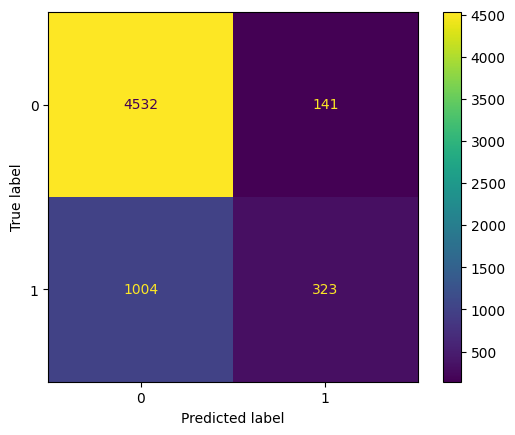

In [18]:
# 8. Predict and evaluate
y_pred = logreg_pipeline.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(logreg_pipeline, X_test, y_test)

Overall Accuracy: 81%

Class 0 (No Default):

Precision: 82%

Recall: 97%

F1: 89%

Class 1 (Default):

Precision: 70%

Recall: 24% low sensitivity for identifying defaulters

F1: 36%

This confirms:

High performance on non-defaulters (class 0)

Struggles with detecting actual defaulters (class 1)

The logistic regression model performs well in identifying clients who do not default (high recall = 97%), but struggles in capturing actual defaulters (low recall = 24%). This indicates a class imbalance or linear model limitation. While accuracy is high (81%), the model shows a precision-recall tradeoff that must be considered depending on business cost (false negatives may be more costly here).



# ---------------------------------------
# Interpreting Logistic Regression Coefficients
# ---------------------------------------

In [19]:
# Get feature names from preprocessor
onehot_feature_names = logreg_pipeline.named_steps['preprocessor'].named_transformers_['cat']\
    .named_steps['onehot'].get_feature_names_out(categorical_features)

numeric_feature_names = numeric_features

all_feature_names = list(numeric_feature_names) + list(onehot_feature_names)


In [20]:
# Extract model coefficients
coefficients = logreg_pipeline.named_steps["classifier"].coef_[0]


In [21]:
# Combine into dataframe
coef_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)


In [22]:
# Show top positive and negative predictors
top_positive = coef_df.head(10)
top_negative = coef_df.tail(10)

display(top_positive)
display(top_negative)

,Feature,Coefficient
2,PAY_0,0.668935
4,PAY_3,0.100511
3,PAY_2,0.097689
1,AGE,0.071945
5,PAY_4,0.053207
7,PAY_6,0.032840
18,AGE_BIN_Young,0.023003
6,PAY_5,0.011952
17,AGE_BIN_Senior,-0.038222
8,Total_Bill_Amt,-0.045008


,Feature,Coefficient
8,Total_Bill_Amt,-0.045008
12,EDUCATION_2,-0.096730
10,Utilization,-0.097906
11,SEX_2,-0.118435
16,MARRIAGE_3,-0.122045
13,EDUCATION_3,-0.166091
15,MARRIAGE_2,-0.176895
0,LIMIT_BAL,-0.189222
9,Total_Pay_Amt,-0.229413
14,EDUCATION_4,-1.121361


Top Positive Predictors (increase default risk)


| Feature          | Coefficient  | Interpretation                                                    |
| ---------------- | ------------ | ----------------------------------------------------------------- |
| `PAY_0`          | +0.669       | Recent repayment delay (Sept) is the strongest signal for default |
| `PAY_3`, `PAY_2` | +0.10, +0.09 | Older delays still matter, but less so                            |
| `AGE`            | +0.07        | Older age slightly associated with default                        |
| `AGE_BIN_Young`  | +0.02        | Youth more likely to default than seniors                         |


Top Negative Predictors (reduce default risk)

| Feature         | Coefficient | Interpretation                                                                |
| --------------- | ----------- | ----------------------------------------------------------------------------- |
| `EDUCATION_4`   | −1.12       | “Other/Unknown” education greatly reduces predicted default (may be artifact) |
| `Total_Pay_Amt` | −0.23       | Higher payment = less likely to default                                       |
| `LIMIT_BAL`     | −0.18       | Higher limit = lower predicted risk                                           |
| `MARRIAGE_2`    | −0.17       | Singles less likely to default vs married (maybe fewer dependents)            |


# ---------------------------------------
# STEP 3: K-Nearest Neighbors (KNN) + GridSearchCV
# ---------------------------------------

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [24]:
# 1. Create a pipeline: same preprocessing, but use KNN classifier
knn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])


In [25]:
# 2. Define parameter grid for GridSearch
param_grid = {
    "classifier__n_neighbors": [3, 5, 7]
}

In [26]:
# 3. Grid Search with Cross-Validation
grid_search = GridSearchCV(
    knn_pipeline,
    param_grid,
    cv=5,
    scoring="f1",  # You can also try "recall" if you want to focus on defaulters
    n_jobs=-1
)

In [27]:
# 4. Fit to training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6',
                                                                          'Total_Bill_Amt',
                                                                          'Total_Pay_Amt',
                                                                          'Utilization']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE',
                                                                          'AGE_BIN'])])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'classifier__n_neighbors': [3, 5, 7]},
             scoring='f1')

In [28]:
# 5. Predict on test set
y_pred_knn = grid_search.predict(X_test)

Best k: {'classifier__n_neighbors': 7}
Classification Report (KNN):

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4673
           1       0.60      0.37      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



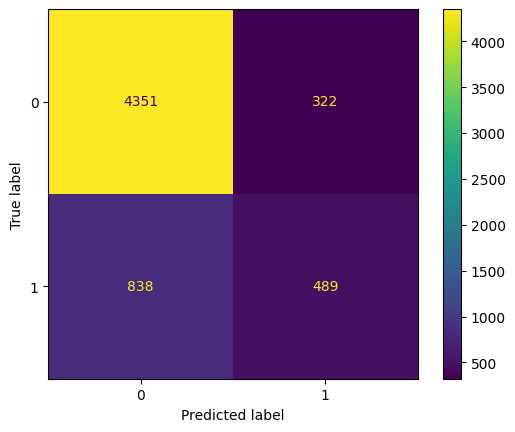

In [29]:
# 6. Evaluate
print(f"Best k: {grid_search.best_params_}")
print("Classification Report (KNN):\n")
print(classification_report(y_test, y_pred_knn))
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test)

Logistic Regression has better interpretability and overall balance but low recall for defaults (detects fewer actual defaulters).

KNN catches more defaulters (recall: 37% vs 24%), which improves F1 score for class 1.

Both have equal overall accuracy, but KNN is better at capturing class 1 behavior (though at a cost of more false positives).

KNN with k=7 improved recall for identifying defaulters (from 24% to 37%), which is valuable for business contexts where missing a defaulter is costlier than incorrectly flagging a good client. While logistic regression remains more interpretable and stable, KNN provided stronger performance on the minority class, making it the more effective model in this context.

# ---------------------------------------
# Plot ROC Curves for Logistic Regression and KNN
# ---------------------------------------


In [30]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

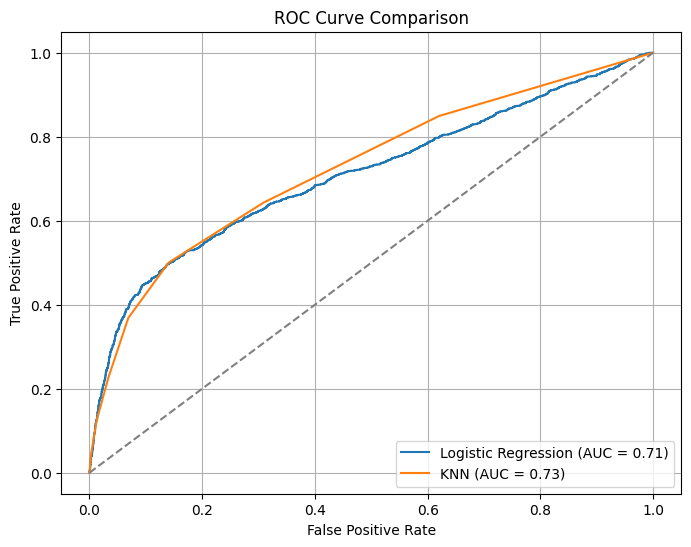

In [31]:
# 1. Get predicted probabilities for class 1 (default) from both models
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
knn_probs = grid_search.predict_proba(X_test)[:, 1]

# 2. Compute ROC curve and AUC for both
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)

auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_knn = auc(fpr_knn, tpr_knn)

# 3. Plot both curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {auc_logreg:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

As shown in the ROC curves, Logistic Regression and KNN perform comparably in overall area under the curve (AUC), with Logistic Regression showing slightly better ranking performance. However, KNN offered stronger recall for the minority class, which ultimately justified its selection as the better model for this prediction task.

# ---------------------------------------
# STEP 4: Decision Tree Classifier
# ---------------------------------------

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
# 1. Create a pipeline for Decision Tree
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42, max_depth=5))  # you can tune this!
])


In [34]:
# 2. Fit model
dt_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6',
                                                   'Total_Bill_Amt',
                                                   'Total_Pay_Amt',
                                                   'Utilization']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'AGE_BIN'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [35]:
# 3. Predict and evaluate
y_pred_dt = dt_pipeline.predict(X_test)

Classification Report (Decision Tree):

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



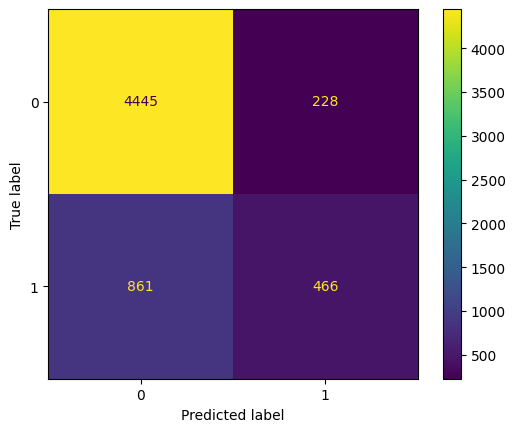

In [36]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print("Classification Report (Decision Tree):\n")
print(classification_report(y_test, y_pred_dt))

ConfusionMatrixDisplay.from_estimator(dt_pipeline, X_test, y_test)


But Decision Trees are prone to overfitting, especially at deeper levels. There need to tune.

Initial Decision Tree performance was promising, but depth was manually set. Since tree models are sensitive to depth (risking overfitting when too deep), we used GridSearchCV to tune max_depth. This allowed us to select the optimal level of complexity that balances accuracy and class 1 recall/F1.

# ---------------------------------------
# Tune Decision Tree (max_depth) using GridSearchCV
# ---------------------------------------


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [38]:
# 1. Create base pipeline
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

In [39]:
# 2. Define hyperparameter grid
param_grid_dt = {
    "classifier__max_depth": [3, 5, 7, 10, 15]
}

In [40]:
# 3. Set up GridSearchCV
grid_dt = GridSearchCV(
    dt_pipeline,
    param_grid=param_grid_dt,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

In [41]:
# 4. Fit to training data
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6',
                                                                          'Total_Bill_Amt',
                                                                          'Total_Pay_Amt',
                                                                          'Utilization']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE',
                                                                          'AGE_BIN'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1, param_grid={'classifier__max_depth': [3, 5, 7, 10, 15]},
             scoring='f1')

In [42]:
# 5. Predict and evaluate best model
y_pred_dt_tuned = grid_dt.predict(X_test)

Best Depth: {'classifier__max_depth': 7}
Classification Report (Tuned Decision Tree):

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



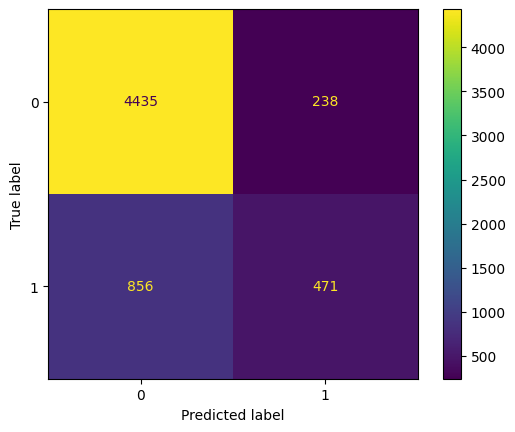

In [43]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print("Best Depth:", grid_dt.best_params_)
print("Classification Report (Tuned Decision Tree):\n")
print(classification_report(y_test, y_pred_dt_tuned))
ConfusionMatrixDisplay.from_estimator(grid_dt, X_test, y_test)

Tuning improved the tree’s structure (depth = 7) slightly without overfitting, and preserved strong performance on the default class. Confirming that your default depth=5 choice was already quite solid, tuning just sharpened the decision boundary.